## Importing Libraries and Reading Dataset

In [2]:
#Importing modules
import pandas as pd 
import numpy as np 
import re 
import matplotlib.pyplot as plt 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aarus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aarus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
#Reading Data
df = pd.read_csv('dataset.csv')
df.head()

Comment Category Sentiment
0  I just tried a new face mask and my skin is gl...  Hygiene  Positive
1  Got the flu and it's making me feel miserable....   Health  Negative
2  I tried a new skincare routine and my skin loo...  Hygiene  Positive
3  Saw a cop car drive by but didn't hear any sir...    Crime   Neutral
4  Someone tried to steal my purse on the street ...    Crime  Negative

In [4]:
df['Comment']

0      I just tried a new face mask and my skin is gl...
1      Got the flu and it's making me feel miserable....
2      I tried a new skincare routine and my skin loo...
3      Saw a cop car drive by but didn't hear any sir...
4      Someone tried to steal my purse on the street ...
                             ...                        
214    Just got a new lip gloss and it's the perfect ...
215    Had a great flight with @Delta! #travel #aviat...
216    Just got accepted into my dream school at @UCL...
217    I woke up with a terrible migraine this mornin...
218    My car got vandalized and it's going to cost a...
Name: Comment, Length: 219, dtype: object

## Visualizing Data by Sentiment

Visualize the frequent words

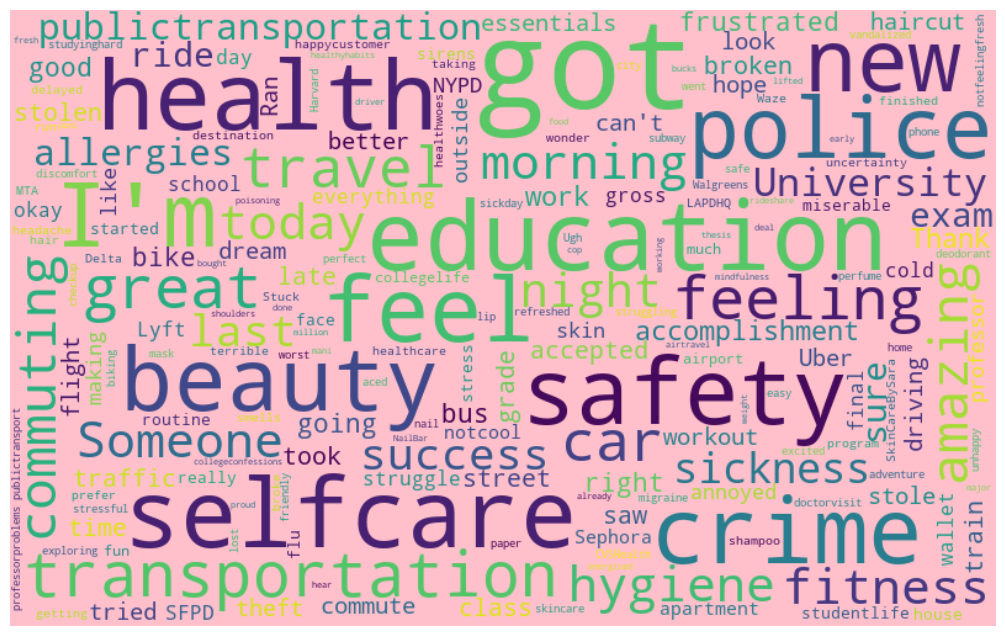

In [5]:
#Visualize the frequent words

all_words = " ".join([sentence for sentence in df[ 'Comment' ]])

from wordcloud import WordCloud
wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='pink', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


Visualizaton of frequent positive words

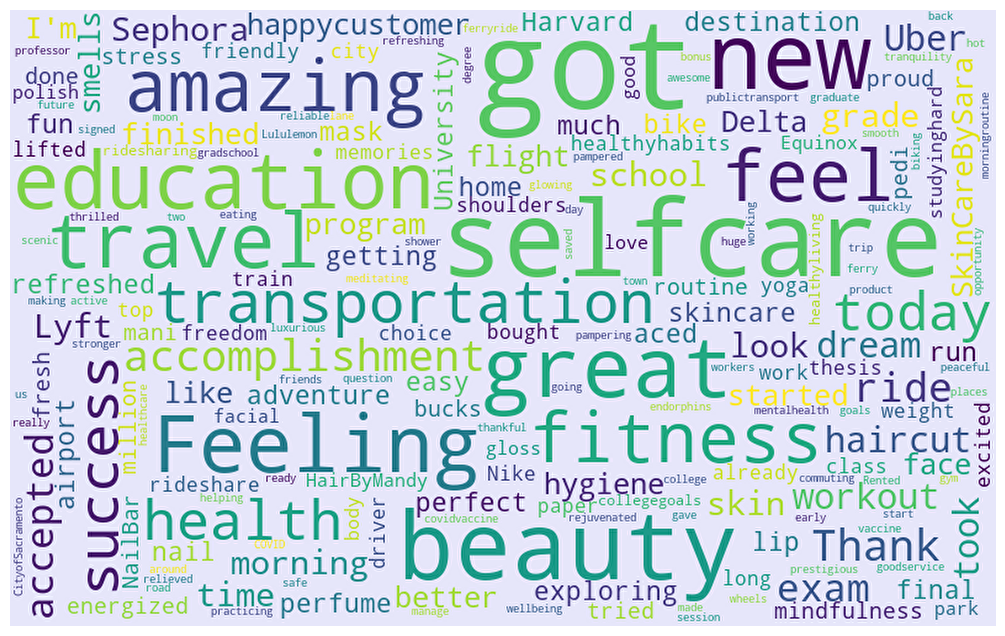

In [6]:
#visualizaton of frequent positive words

all_words = " ".join([sentence for sentence in df['Comment'][df['Sentiment']=="Positive"]])  #0 for positive, 1 for negative

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='lavender', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

Visualization of frequent negative words

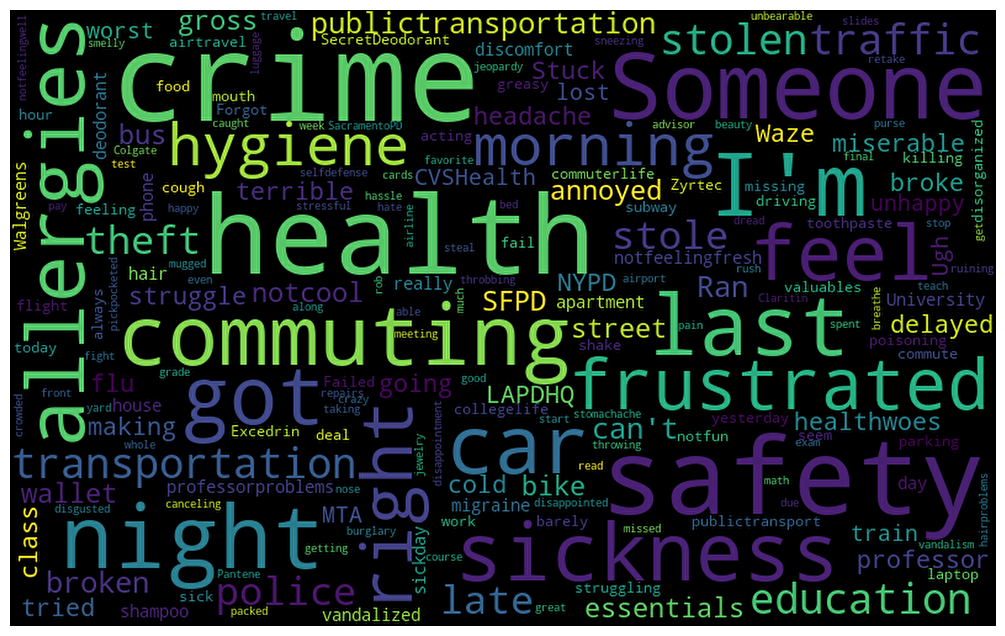

In [7]:
#visualization of frequent negative words

all_words = " ".join([sentence for sentence in df['Comment'][df['Sentiment']=="Negative"]])

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

Visualization of frequent neutral words

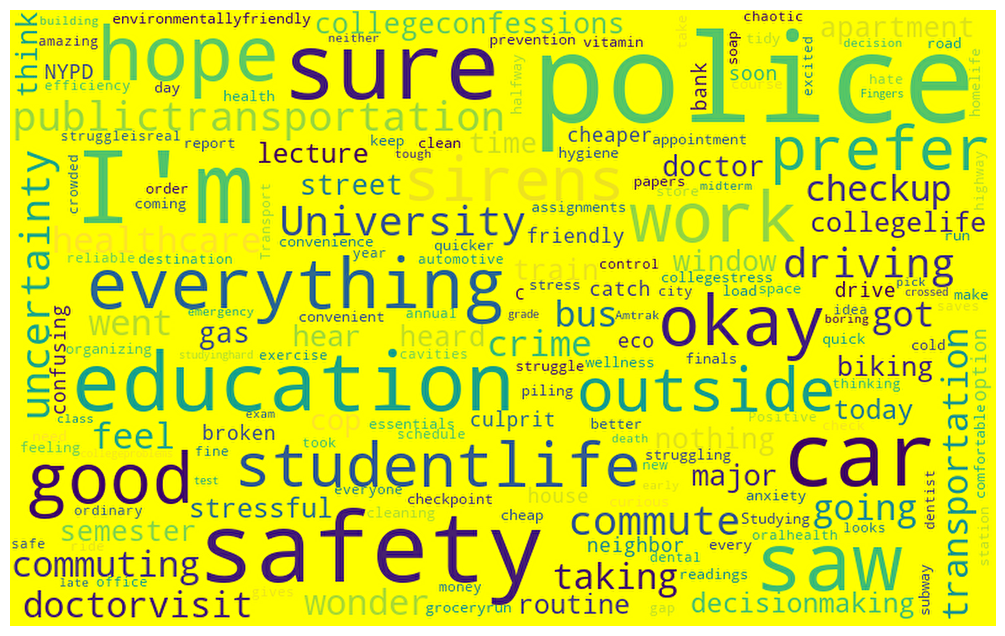

In [8]:
#visualization of frequent neutral words

all_words = " ".join([sentence for sentence in df['Comment'][df['Sentiment']=="Neutral"]])

wc = WordCloud(collocations=False, stopwords= stopwords.words('english'), background_color='yellow',width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

## Sentiment Analyzer

Using Count Vectorization to extract features of Text

In [9]:
#Count Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(lowercase=True, tokenizer = nltk.word_tokenize, stop_words= stopwords.words('english') , ngram_range=(1,2))

Splitting data

In [10]:
#Splitting Data into traing and testing
from sklearn.model_selection import train_test_split
x = df['Comment']
y_sentiment = df['Sentiment']
y_category = df['Category']
xtrain1, xtest1,ytrain1, ytest1 = train_test_split(x,y_sentiment, test_size=0.2, random_state=42, shuffle=True)

In [11]:
x_senti_vec = cv.fit_transform(xtrain1).toarray()
x_test_senti_vec = cv.transform(xtest1).toarray()

c:\Python39\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [12]:
x_senti_vec

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Building a Multinomial Navies Baye's Classifier model

In [13]:
#Building a Multinomial Navies Baye's Classifier
from sklearn.naive_bayes import MultinomialNB
mn_senti = MultinomialNB()
mn_senti.fit(x_senti_vec,ytrain1)
y_pred_senti = mn_senti.predict(x_test_senti_vec)

In [14]:
y_pred_senti

array(['Negative', 'Positive', 'Positive', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Positive',
       'Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Positive', 'Negative', 'Positive', 'Negative', 'Negative',
       'Positive', 'Negative', 'Neutral', 'Positive', 'Positive',
       'Negative', 'Neutral', 'Neutral', 'Neutral', 'Negative',
       'Positive', 'Positive', 'Negative', 'Positive', 'Positive',
       'Positive', 'Negative', 'Negative', 'Negative', 'Neutral',
       'Neutral', 'Negative', 'Negative', 'Neutral'], dtype='<U8')

Performance metrics

In [15]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
accuracy_score(ytest1, y_pred_senti)

0.8863636363636364

In [16]:
f1_score(ytest1, y_pred_senti, average="macro")

0.8724381950188401

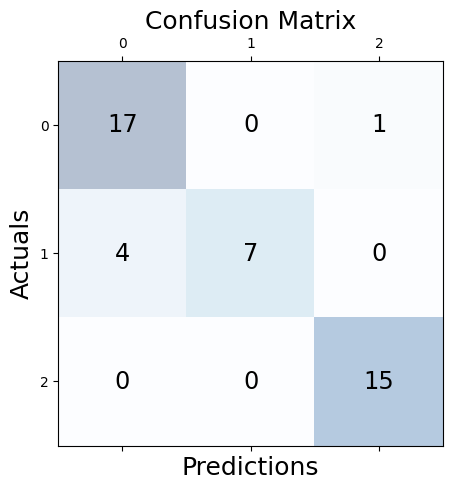

In [17]:
conf_matrix = confusion_matrix(y_true=ytest1, y_pred=y_pred_senti)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Visualizing Data by Category

Visualzing frequent words about Transportation

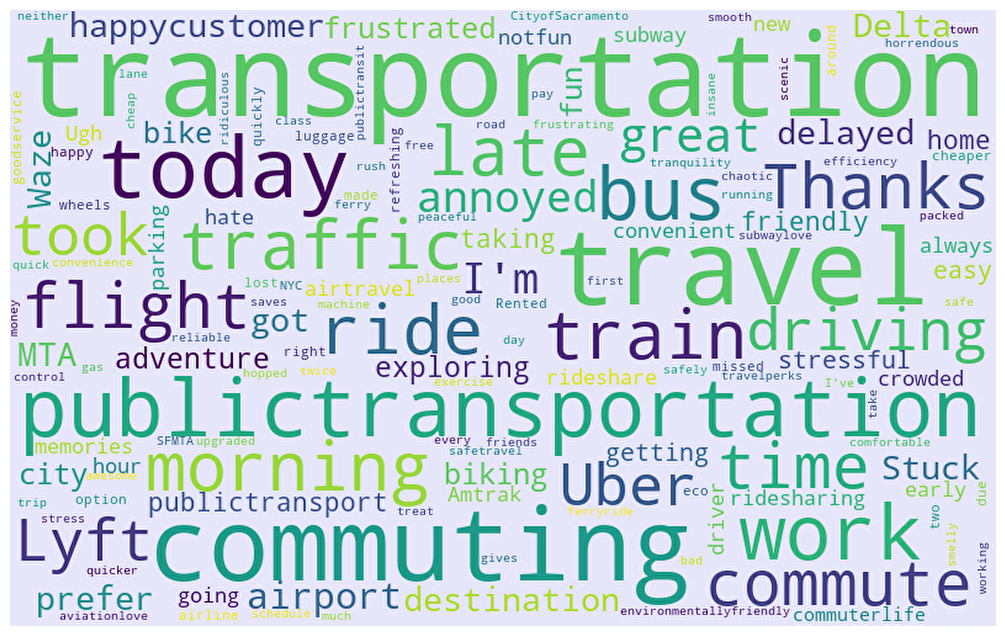

In [18]:
all_words = " ".join([sentence for sentence in df['Comment'][df['Category']=="Transport"]])  #0 for positive, 1 for negative

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='lavender', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

Visualzing frequent words about Education

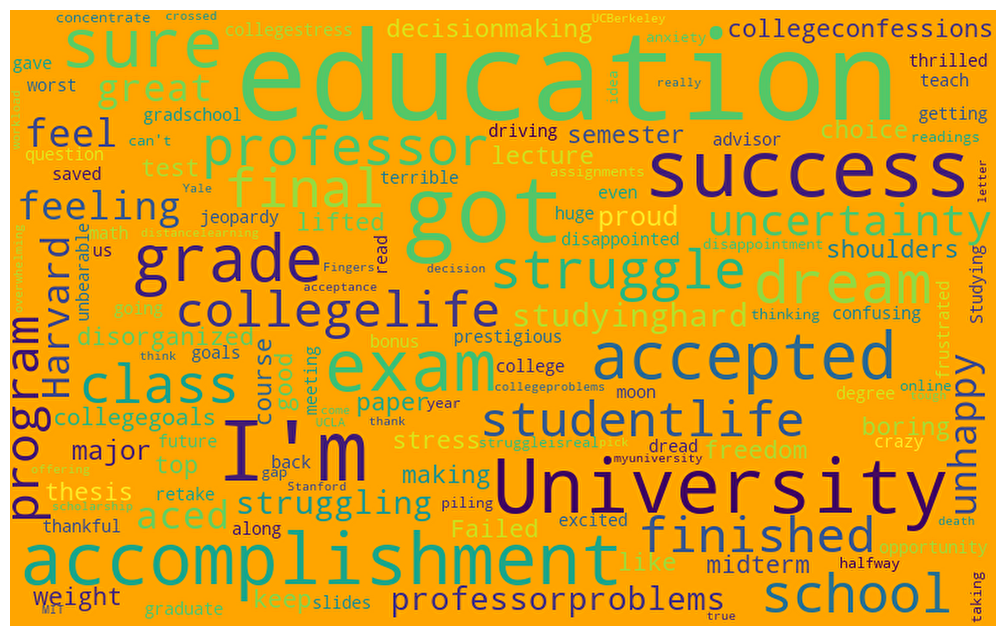

In [19]:
all_words = " ".join([sentence for sentence in df['Comment'][df['Category']=="Education"]])  #0 for positive, 1 for negative

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='orange', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

Visualzing frequent words about Crime

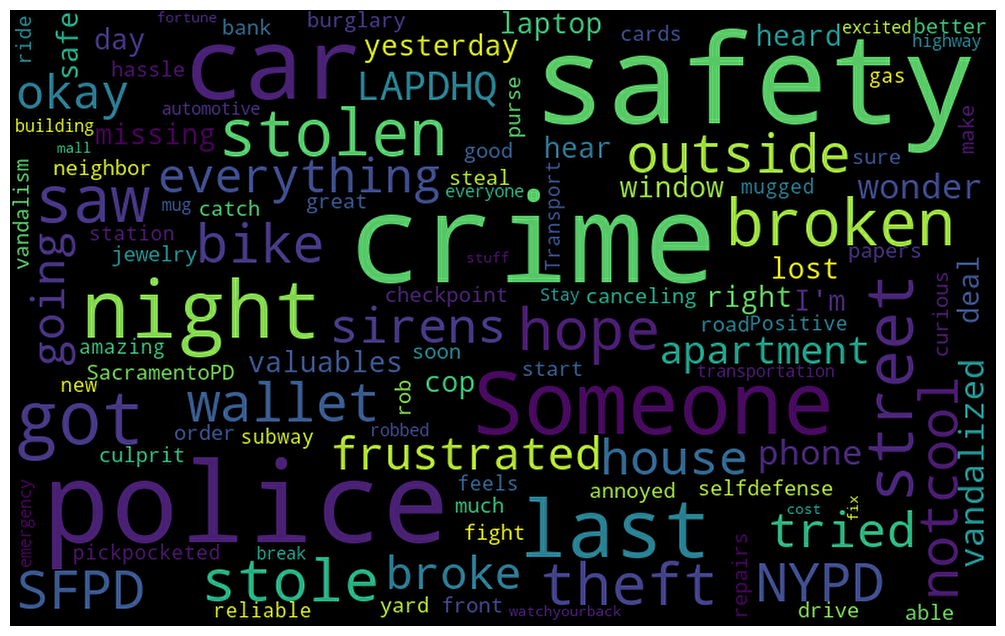

In [20]:

all_words = " ".join([sentence for sentence in df['Comment'][df['Category']=="Crime"]])  #0 for positive, 1 for negative

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='black', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

Visualzing frequent words about Health

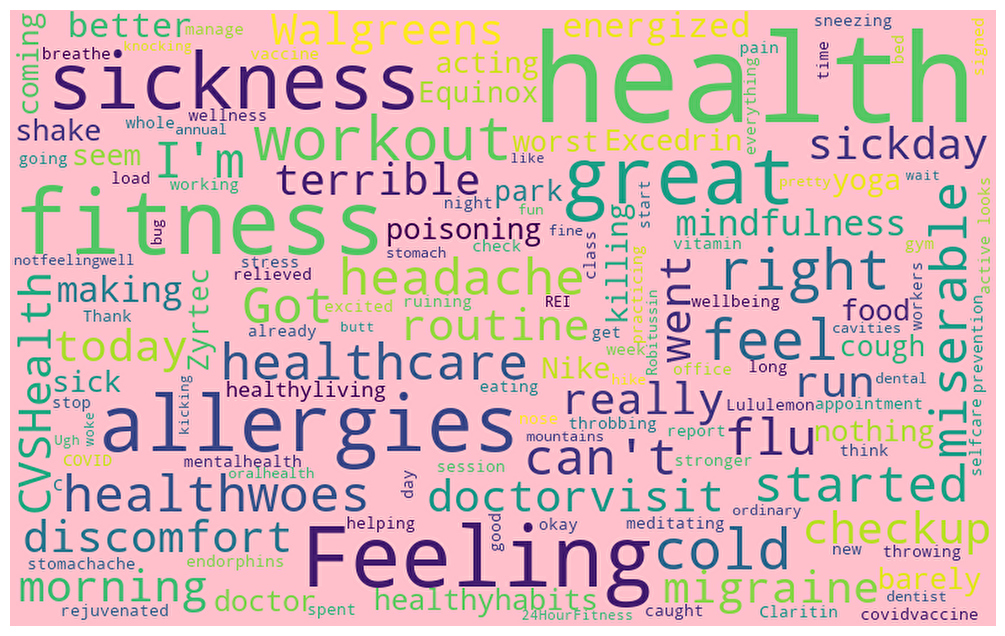

In [21]:
all_words = " ".join([sentence for sentence in df['Comment'][df['Category']=="Health"]])  #0 for positive, 1 for negative

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='pink', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

Visualzing frequent words about Hygiene

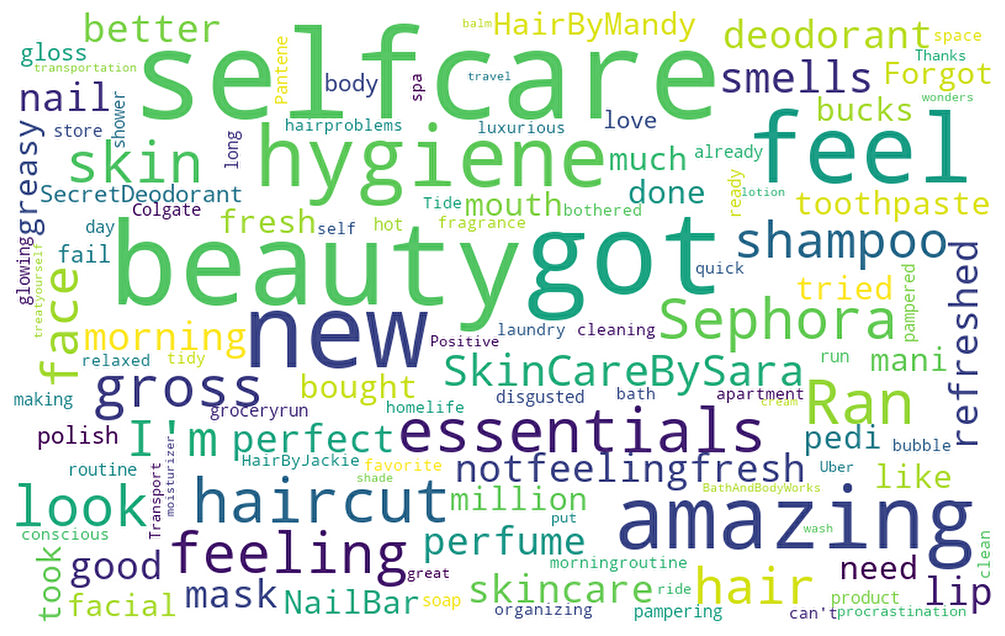

In [22]:
all_words = " ".join([sentence for sentence in df['Comment'][df['Category']=="Hygiene"]])  #0 for positive, 1 for negative

wc = WordCloud(collocations=False,stopwords= stopwords.words('english'), background_color='white', width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#graph
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='sinc')
plt.axis('off')
plt.show()

## Classification by Category

Splitting Data

In [23]:
#Splitting data
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x,y_category, test_size=0.2, random_state=42, shuffle=True)

In [24]:
x_category_vec = cv.fit_transform(xtrain2).toarray()
x_test_category_vec = cv.transform(xtest2).toarray()

Building a Multinomial Navies Baye's Classifier model

In [25]:
#Building model to classify category
mn_category = MultinomialNB()
mn_category.fit(x_category_vec,ytrain2)
y_pred_category = mn_category.predict(x_test_category_vec)

In [26]:
y_pred_category

array(['Transport', 'Hygiene', 'Education', 'Health', 'Health',
       'Transport', 'Health', 'Crime', 'Crime', 'Transport', 'Transport',
       'Transport', 'Transport', 'Crime', 'Health', 'Hygiene', 'Crime',
       'Transport', 'Health', 'Education', 'Health', 'Education',
       'Transport', 'Education', 'Hygiene', 'Crime', 'Education', 'Crime',
       'Crime', 'Crime', 'Health', 'Health', 'Hygiene', 'Transport',
       'Transport', 'Hygiene', 'Crime', 'Transport', 'Crime', 'Health',
       'Crime', 'Health', 'Health', 'Education'], dtype='<U9')

Performance Metrics

In [27]:
from sklearn.metrics import f1_score, accuracy_score
accuracy_score(ytest2, y_pred_category)

1.0

In [28]:
f1_score(ytest1, y_pred_senti, average="macro")

0.8724381950188401

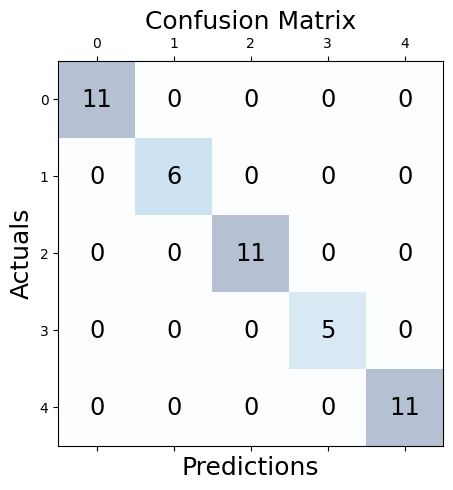

In [29]:
conf_matrix = confusion_matrix(y_true=ytest2, y_pred=y_pred_category)

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Taking input and Classifying by Sentiment and Category

In [39]:
#Enter input data
inp = list(input("Enter Data(Comments) separated by commas: ").split(","))
inp

['I hate traffic', ' I went to the doctor today']

In [40]:
inp_vec = cv.transform(inp).toarray()
s = mn_senti.predict(inp_vec)
c = mn_category.predict(inp_vec)

In [41]:
classification_result = []
for _ in range(len(inp)):
    val = []
    val.append(inp[_])
    val.append(s[_])
    val.append(c[_])
    classification_result.append(val)
    

In [42]:
from tabulate import tabulate
print (tabulate(classification_result , headers=["Comment", "Sentiment", "Categoty"]))

Comment                     Sentiment    Categoty
--------------------------  -----------  ----------
I hate traffic              Negative     Transport
I went to the doctor today  Positive     Health


In [43]:
#get a csv file of the result
import csv

with open('result.csv', 'w', newline='') as file:
     writer = csv.writer(file)
     writer.writerows(classification_result)